In [49]:
#IMPORT 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [50]:
#check the path for loading data
#pwd

In [51]:
#Load the csv into a dataframe and get a brief summary
review = pd.read_csv('../../amazon-fine-food-reviews/Reviews.csv')
review.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


In [52]:
#Look at the first 3 rows of the df
review.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


In [53]:
#Extract the ccolumns' names
review.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

## Explorations on Ratings
### 1. Correlation between the number of reviews (from a single costumer) and mean ratings 

In [54]:
#Only care abt 'Score' colmn and the userId correspondig to each score
df1 = review[['UserId','Score']] 

In [55]:
df1a = df1.groupby(['UserId']).agg({'Score': [np.size, np.mean]})
df1a.columns = ['review_size','review_mean']   #rename the colomns for convinence: to avoid different level of columns name

In [56]:
df1a.head(5)

,review_size,review_mean
UserId,,
#oc-R103C0QSV1DF5E,1,5.0
#oc-R109MU5OBBZ59U,1,5.0
#oc-R10LFEMQEW6QGZ,1,5.0
#oc-R10LT57ZGIB140,1,3.0
#oc-R10UA029WVWIUI,1,1.0


In [57]:
df1a.describe()

,review_size,review_mean
count,256059.000000,256059.000000
mean,2.220012,4.168984
std,4.443361,1.313261
min,1.000000,1.000000
25%,1.000000,4.000000
50%,1.000000,5.000000
75%,2.000000,5.000000
max,448.000000,5.000000


The ratings has a 4.17 mean and 1.31 std along with its 1st/2nd/3rd percentails indicationg that the ratings should not have a spread distributin. Let's draw it!

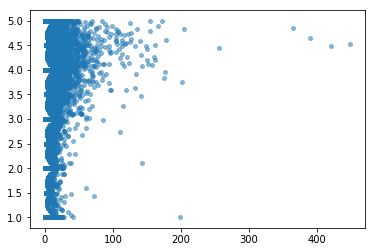

In [59]:
#Distribution of rating times & rating scores mean for each user
# x-axis: number of ratings that a user has given
# y-axis: the corresponding mean of rating scores 
plt.scatter(df1a['review_size'],df1a['review_mean'],alpha=0.5,s=15)

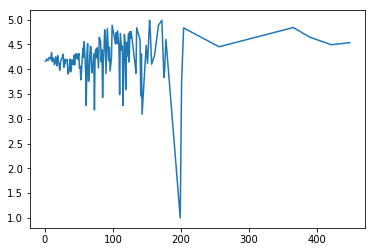

In [60]:
# Average of TOTAL rating scores VS total times of ratings 
df1a.columns = ['review_size','review_mean']
df1aa = df1a.groupby(['review_size']).mean() #The average of all rating scores given by multiple users who has the same rating numbers
plt.plot(df1aa,label="...")

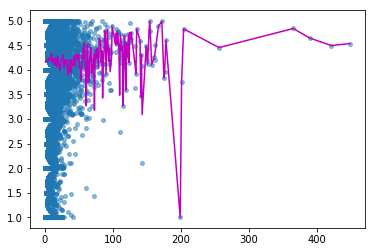

In [61]:
# Put two plots together 
plt.scatter(df1a[['review_size']],df1a['review_mean'],alpha=0.5,s=15)
plt.plot(df1aa, color='m',label="...")

** Findings:**
1. Most people give ~50 reviews with ~4.0 stars on average :0
2. In the range of giving 0 to ~50 ratings, the mean rating scores are quite stable around 4.2
3. The mean starts to fluctuate more and outliers appear (ex: at x= 200) when total number of ratings increases

**--- Thus, should focus on data of users who has given less than 100 ratings for model training**
**--- For sentimental analysis, should we exclude data like x = 200???? **

### X ~= 200

In [62]:
df1a.columns

Index(['review_size', 'review_mean'], dtype='object')

In [64]:
df1a[(df1a['review_size'] >= 150 )& (df1a['review_mean'] <= 2)]

,review_size,review_mean
UserId,,
A3TVZM3ZIXG8YW,199,1.0


In [69]:
df199 = review[review.UserId == 'A3TVZM3ZIXG8YW']
df199

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
2941,2942,B0002TJAZK,A3TVZM3ZIXG8YW,christopher hayes,7,11,1,1291420800,"Filler food is empty, leaves your cat always n...","This review will make me sound really stupid, ..."
2947,2948,B0002TJAZK,A3TVZM3ZIXG8YW,christopher hayes,0,2,1,1291420800,"Filler food is empty, leaves your cat always n...","This review will make me sound really stupid, ..."
31782,31783,B00106TG9Y,A3TVZM3ZIXG8YW,christopher hayes,2,8,1,1291420800,"Filler food is empty, leaves your cat always n...","This review will make me sound really stupid, ..."
52496,52497,B003ANFMY8,A3TVZM3ZIXG8YW,christopher hayes,19,21,1,1291420800,"Filler food is empty, leaves your cat always n...","This review will make me sound really stupid, ..."
52501,52502,B003ANFMY8,A3TVZM3ZIXG8YW,christopher hayes,18,24,1,1291420800,"Filler food is empty, leaves your cat always n...","This review will make me sound really stupid, ..."
52506,52507,B003ANFMY8,A3TVZM3ZIXG8YW,christopher hayes,3,3,1,1291420800,"Filler food is empty, leaves your cat always n...","This review will make me sound really stupid, ..."
52509,52510,B003ANFMY8,A3TVZM3ZIXG8YW,christopher hayes,7,9,1,1291420800,"Filler food is empty, leaves your cat always n...","This review will make me sound really stupid, ..."
52510,52511,B003ANFMY8,A3TVZM3ZIXG8YW,christopher hayes,11,15,1,1291420800,"Filler food is empty, leaves your cat always n...","This review will make me sound really stupid, ..."
52511,52512,B003ANFMY8,A3TVZM3ZIXG8YW,christopher hayes,11,15,1,1291420800,"Filler food is empty, leaves your cat always n...","This review will make me sound really stupid, ..."
52519,52520,B003ANFMY8,A3TVZM3ZIXG8YW,christopher hayes,33,48,1,1291420800,"Filler food is empty, leaves your cat always n...","This review will make me sound really stupid, ..."


In [77]:
#Check whether all 200 reviews this user had were all duplicated (it seems like it...)
# df199dup = df199[df199.duplicated(['UserId','Score','Text'],keep = False)]
# print(df199dup.shape)
df199.nunique()


Id                        199
ProductId                  38
UserId                      1
ProfileName                 1
HelpfulnessNumerator       11
HelpfulnessDenominator     13
Score                       1
Time                        1
Summary                     1
Text                        1
dtype: int64

In [78]:
#Check the ProductId
df199['ProductId'].value_counts().sort_index()

B000084DWM    10
B0002MLA5K    10
B0002TJAZK     2
B0002TJB04     2
B000633QVG     2
B000633ZFS     1
B0006345PW    10
B0009YSD6U     2
B000KTWAWC     1
B000QSN7P6    10
B00106TG9Y     1
B001VIY8BW    10
B001VIYCK4    10
B001VJ3GEQ     1
B002Z9EQPO     2
B002Z9EQQ8     2
B0038M4DZ0     2
B003ANFMY8    10
B003BJOORW    10
B003M5TG28    10
B003M5VM8O     1
B003M5WNKU     1
B003M60K54    10
B003M9ZJXE     1
B003MA8P02    10
B003MW77W2     1
B003MW7858    10
B003MWBFMK    10
B003MWBFXY    10
B003MWCXEE     1
B003MWCXHQ     1
B003MWERTS     1
B003MWGSKY     1
B003WK0D8O    10
B0051VFG70     1
B009B87SAC    10
B009GHI5Q4    10
B009GHI6I6     2
Name: ProductId, dtype: int64

In [97]:
df199a = df199[['ProductId','HelpfulnessNumerator','HelpfulnessDenominator']]
df199a['Count'] = df199a['HelpfulnessNumerator']+ df199a['HelpfulnessDenominator']
df199a['Helpfulness_r'] = df199a['HelpfulnessNumerator']/df199a['Count']
df199a

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,ProductId,HelpfulnessNumerator,HelpfulnessDenominator,Count,Helpfulness_r
2941,B0002TJAZK,7,11,18,0.388889
2947,B0002TJAZK,0,2,2,0.000000
31782,B00106TG9Y,2,8,10,0.200000
52496,B003ANFMY8,19,21,40,0.475000
52501,B003ANFMY8,18,24,42,0.428571
52506,B003ANFMY8,3,3,6,0.500000
52509,B003ANFMY8,7,9,16,0.437500
52510,B003ANFMY8,11,15,26,0.423077
52511,B003ANFMY8,11,15,26,0.423077
52519,B003ANFMY8,33,48,81,0.407407


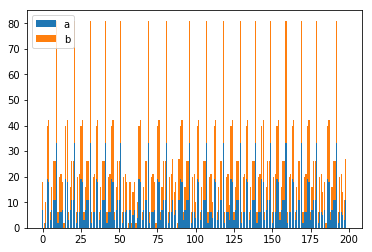

<Figure size 7200x720 with 0 Axes>

In [144]:
size = 199
x = np.arange(size)
a = np.array(df199a['HelpfulnessNumerator']).reshape(1,-1) 
b = np.array( df199a['HelpfulnessDenominator']).reshape(1,-1)  
plt.bar(x,a[0], label='a')
plt.bar(x,b[0], bottom=a[0], label='b')
plt.legend()
plt.figure(figsize=(100,10))
plt.show()

In [146]:
df199a[(df199a['Count'] == 81)]

,ProductId,HelpfulnessNumerator,HelpfulnessDenominator,Count,Helpfulness_r
52519,B003ANFMY8,33,48,81,0.407407
96844,B003WK0D8O,33,48,81,0.407407
97989,B0002MLA5K,33,48,81,0.407407
144972,B003MA8P02,33,48,81,0.407407
149961,B003M60K54,33,48,81,0.407407
224273,B000QSN7P6,33,48,81,0.407407
247069,B003M5TG28,33,48,81,0.407407
318807,B003MW7858,33,48,81,0.407407
354402,B001VIY8BW,33,48,81,0.407407
369803,B000084DWM,33,48,81,0.407407


In [161]:
plt.plot(df199a['Helpfulness'],label="...")

KeyError: 'Helpfulness'

Condlucsion: really should get rid of duplicated comments 

### 2.  Rating scores distribution 
#### ( quickly check it to verify the summary given in previous section)

In [79]:
# Only cares about scores 
df2 = review['Score']
df2a = df2.value_counts().sort_index() # Count the number of diff rating scores and sort it|

In [80]:
df2a

1     52268
2     29769
3     42640
4     80655
5    363122
Name: Score, dtype: int64

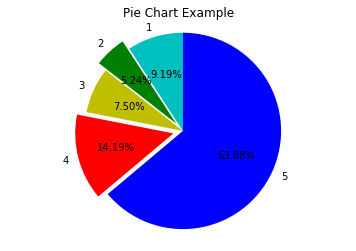

In [81]:
# Plot a Pie....chart!
labels = [str(df2a.index[x]) for x in range(5)]
sections = df2a.values

colors = ['c', 'g', 'y', 'r', 'b']

plt.pie(sections, labels=labels, colors=colors,
        startangle=90,
        explode = (0, 0.1, 0,0.1,0),
        autopct = '%1.2f%%')

plt.axis('equal') # Try commenting this out.
plt.title('Pie Chart Example')
plt.show()

## Explorations on ProductID
### 1. number of 

In [147]:
import datetime

In [148]:
# Transfer Time colomn into readble data
review['Time'] = review['Time'].apply(datetime.datetime.fromtimestamp)
review['Year'] = review['Time'].apply(lambda x: x.year)
review.head(2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Year
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27 08:00:00,Good Quality Dog Food,I have bought several of the Vitality canned d...,2011
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07 08:00:00,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,2012


In [149]:
df1 = review[['ProductId','Score','Year']]
df1a = df1.groupby(['Year','ProductId']).agg({'Score': [np.size, np.mean]})  ###.Score.agg(['mean','count'])
df1a.columns = ['count', 'review_mean'] #rename the colomns for convinence
df1a.head(10)

count  review_mean
Year ProductId                     
1999 0006641040      2     5.000000
     B00004CI84      1     5.000000
     B00004CXX9      2     5.000000
     B00004RYGX      1     5.000000
2000 B00002N8SM      1     5.000000
     B00002Z754      2     5.000000
     B00004CI84      8     4.375000
     B00004CXX9      9     4.444444
     B00004RAMX      1     5.000000
     B00004RYGX      8     4.375000

In [150]:
df1b = df1a.sort_values(['Year','count'],ascending=False).groupby('Year').head(5)
df1b = df1b.sort_values(['Year'],ascending=True)
df1b.tail(10)

count  review_mean
Year ProductId                     
2011 B004ZIER34    309     3.504854
     B004JGQ15E    294     4.204082
     B004BKLHOS    293     4.283276
     B004U49QU2    290     3.327586
     B003XDH6M6    293     4.023891
2012 B005ZBZLT4    480     4.372917
     B002IEZJMA    483     3.592133
     B002IEVJRY    483     3.853002
     B006MONQMC    491     3.380855
     B007JFMH8M    913     4.582694

In [151]:
#Get list of unique Product ID
list = df1b.index.values.tolist()
np.shape(list)

(69, 2)

In [152]:
df1c = df1b.groupby('ProductId').agg('sum')
df1c = df1c.sort_values('count',ascending=False)
df1c.head(10)

,count,review_mean
ProductId,,
B007JFMH8M,913,4.582694
B006MONQMC,491,3.380855
B002IEVJRY,483,3.853002
B002IEZJMA,483,3.592133
B005ZBZLT4,480,4.372917
B0090X8IPM,418,3.830144
B003GTR8IO,418,3.830144
B001LGGH40,337,3.575668
B001LG940E,332,3.689759


In [153]:
xx = np.array(list)
ID_list = np.unique([list[x][1] for x in range(69)])
len(xx)

69

In [154]:
ID_list = np.unique([list[x][1] for x in range(69)])
ID_list

array(['0006641040', 'B00002Z754', 'B00004CI84', 'B00004CXX9',
       'B00004RYGX', 'B00004S1C5', 'B00004S1C6', 'B00005U2FA',
       'B00006L2ZT', 'B00008RCMI', 'B0001ES9F8', 'B0001ES9FI',
       'B0002TA77A', 'B0007NOWMM', 'B000A28TJ2', 'B000AQFQC6',
       'B000AQJRWG', 'B000ENUC3S', 'B000FI4O90', 'B000REI2X6',
       'B0018KLPFK', 'B001BCVY4W', 'B001BCVY9W', 'B001BCXTGS',
       'B001EO5U3I', 'B001EQ55RW', 'B001EQ55ZO', 'B001LG940E',
       'B001LG945O', 'B001LGGH40', 'B001LGGH54', 'B001OCKIP0',
       'B0029XLH4Y', 'B002IEVJRY', 'B002IEZJMA', 'B003GTR8IO',
       'B003XDH6M6', 'B004BKLHOS', 'B004JGQ15E', 'B004U49QU2',
       'B004ZIER34', 'B0052OUAOK', 'B005ZBZLT4', 'B006MONQMC',
       'B006N3HZ6K', 'B007JFMH8M', 'B007TJGY46', 'B008J1HO4C',
       'B0090X8IPM'], dtype='<U10')

In [155]:
word_dict = {ID_list[i]: i+1 for i in range(49)}

In [156]:
score = np.array(df1b['review_mean']).reshape(-1,1)  # reshape from (69,) to (69, 1)
counts =np.array(df1b['count']).reshape(-1,1)
xxx = [word_dict[xx[i][1]] for i in range(69)]
yyy = [xx[i][0] for i in range(69)]

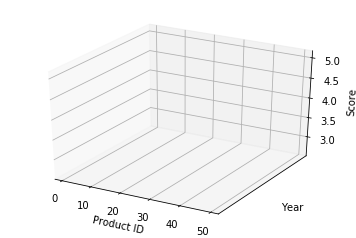

In [157]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = xxx
y = yyy
z = score


ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('Product ID')
ax.set_ylabel('Year')
ax.set_zlabel('Score')

plt.show()


In [158]:
#It's a little pointless to plot the average score in a 3d graph...so let' use count

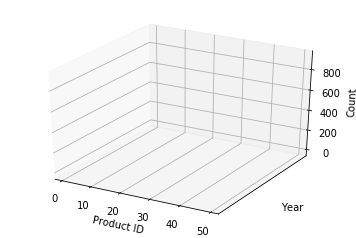

In [159]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = xxx
y = yyy
z = counts

ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('Product ID')
ax.set_ylabel('Year')
ax.set_zlabel('Count')

plt.show()

### Words used in reviews 
- most frequently used in general
- most frequently used with good/bad scores

In [20]:
df3 = review[['Score','Text']]
df3['Text'] = df3['Text'].apply(lambda x: str.split(x))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [21]:
df3.head(5)

,Score,Text
0,5,"[I, have, bought, several, of, the, Vitality, ..."
1,1,"[Product, arrived, labeled, as, Jumbo, Salted,..."
2,4,"[This, is, a, confection, that, has, been, aro..."
3,2,"[If, you, are, looking, for, the, secret, ingr..."
4,5,"[Great, taffy, at, a, great, price., There, wa..."


In [ ]:
df3a = df3.groupby(['Score']).sum()

In [26]:
print(df4.isnull().any())

Score      False
Summary     True
dtype: bool


In [20]:
df4 = review[['Score','Summary']]
df4['Summary'] = df4['Summary'].apply(lambda x: str.split(x))

TypeError: descriptor 'split' requires a 'str' object but received a 'float'

In [27]:
print(df4.isnull().any())

Score      False
Summary     True
dtype: bool
